In [35]:
### Extra code to reuse

## Exporting data to CSV
# combined_data.to_csv('file_name.csv')

## Finding what the Data Type a column is.
# data_type = IMDb_Basics['isAdult'].dtype
# print(data_type)

## Filtering dataframes for a specific values
# filtered_df = IMDB_Basics[IMDB_Basics['primaryTitle'].str.contains('Bond', case=False, na=False)]
# print(filtered_df)

# Optionally save the combined dataframe to a new CSV file
# output_file = path_to_files + 'combined_data.csv'
# combined_df.to_csv(output_file, index=False)
# print(f"Combined CSV saved to {output_file}")

# Code to troubleshoot date columns

# 1. Check for NaT values:
# If you used errors='coerce' during the conversion, you can check for NaT values, which would indicate conversion failures.
# nat_counts = all_stocks['Date'].isna().sum()
# print(f"Number of NaT values in 'Date': {nat_counts}")

# 2. Check the range of dates:
# Look at the minimum and maximum values to ensure they are within expected bounds.
# print("Earliest date:", all_stocks['Date'].min())
# print("Latest date:", all_stocks['Date'].max())

# 3. Sample random dates:
# Random sampling of dates can give you a quick spot check to see if dates look correctly formatted.
# print(all_stocks['Date'].sample(10))

# 4. Validate with known dates:
# If you know certain dates should exist in the dataset, check those specifically.
# known_dates = ["1997-05-15", "2005-07-08"]  # Example dates you expect to find
# for date in known_dates:
#     if pd.to_datetime(date) not in all_stocks['Date'].values:
#         print(f"Date {date} is not found or incorrectly formatted.")
#     else:
#         print(f"Date {date} is correctly formatted.")

# 5. Check for duplicates:
# Ensuring that there are no duplicate dates which could suggest an issue with the conversion.
# duplicate_dates = all_stocks['Date'].duplicated().sum()
# print(f"Number of duplicate dates: {duplicate_dates}")

## Remove duplicate rows based on the 'Release' column, keeping the first occurrence
# no_duplicates = no_duplicates.drop_duplicates(subset='Release', keep='first')

# # Remove the dollar sign and commas, then convert the column to numeric values
# no_duplicates['Gross'] = no_duplicates['Gross'].replace(r'[\$,]', '', regex=True).astype(float)
# # Calculate the mean of the 'Gross' column after conversion
# gross_mean = no_duplicates['Gross'].mean()
# # Now 'gross_mean' contains the average of the 'Gross' column as a float
# print(gross_mean)


In [36]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

os.chdir('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5783 - APPLIED MICROECONOMETRICS/Project Proposal - Arya/Data')

In [37]:
# # Load the datasets
# title_basics = pd.read_csv('IMDb Basics.tsv', sep='\t', low_memory=False)
# name_basics = pd.read_csv('IMDb Name Basics.tsv', sep='\t', low_memory=False)
# title_ratings = pd.read_csv('IMDb Ratings.tsv', sep='\t', low_memory=False)
# title_principals = pd.read_csv('IMDb Title Principals.tsv', sep='\t', low_memory=False)

# # Merging the datasets
# merged_data1 = pd.merge(title_basics, title_ratings, on='tconst')
# merged_data2 = pd.merge(merged_data1, title_principals, on='tconst')
# merged_df = pd.merge(merged_data2, name_basics, on='nconst')

# ## Exporting data to CSV
# merged_df.to_csv('merged_df.csv')

In [38]:
# Loading the data from CSV for all the data that was merged above
merged_df = pd.read_csv('merged_df.csv')

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_8507/1858143984.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_df.csv')


In [39]:
# Python
print(merged_df.isnull().sum())

Unnamed: 0                0
tconst                    0
titleType                 0
primaryTitle              0
originalTitle             0
isAdult                   0
startYear                 0
endYear                   0
runtimeMinutes            0
genres                   29
averageRating             0
numVotes                  0
ordering                  0
nconst                    0
category                  0
job                       0
characters                0
primaryName               0
birthYear                 0
deathYear                 0
primaryProfession    375448
knownForTitles            0
dtype: int64


In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11327769 entries, 0 to 11327768
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   tconst             object 
 2   titleType          object 
 3   primaryTitle       object 
 4   originalTitle      object 
 5   isAdult            int64  
 6   startYear          object 
 7   endYear            object 
 8   runtimeMinutes     object 
 9   genres             object 
 10  averageRating      float64
 11  numVotes           int64  
 12  ordering           int64  
 13  nconst             object 
 14  category           object 
 15  job                object 
 16  characters         object 
 17  primaryName        object 
 18  birthYear          object 
 19  deathYear          object 
 20  primaryProfession  object 
 21  knownForTitles     object 
dtypes: float64(1), int64(4), object(17)
memory usage: 1.9+ GB


In [41]:
merged_df['is_actress'] = merged_df['primaryProfession'].apply(lambda x: 1 if 'actress' in str(x).split(',') else 0)
# Convert 'startYear' to integers, handling non-numeric values as NaN (errors='coerce')
merged_df['startYear'] = pd.to_numeric(merged_df['startYear'], errors='coerce')

# Create the new column with 1 if 'startYear' is after 2017, 0 otherwise
merged_df['is_after_2017'] = merged_df['startYear'].apply(lambda x: 1 if x > 2017 else 0)

# If there were non-numeric values in 'startYear', you might want to handle NaN values in 'is_after_2017'
# For example, replacing NaN with 0 (optional)
merged_df['is_after_2017'].fillna(0, inplace=True)

merged_df['is_action'] = merged_df['genres'].str.contains('Action', na=False).astype(int)
merged_df['is_drama'] = merged_df['genres'].str.contains('Drama', na=False).astype(int)
merged_df['is_romance'] = merged_df['genres'].str.contains('Romance', na=False).astype(int)
merged_df['is_scifi'] = merged_df['genres'].str.contains('Sci-Fi', na=False).astype(int)
merged_df['is_comedy'] = merged_df['genres'].str.contains('Comedy', na=False).astype(int)
merged_df['is_adventure'] = merged_df['genres'].str.contains('Adventure', na=False).astype(int)
merged_df['is_documentary'] = merged_df['genres'].str.contains('Documentary', na=False).astype(int)
merged_df['is_fantasy'] = merged_df['genres'].str.contains('Fantasy', na=False).astype(int)
merged_df['is_history'] = merged_df['genres'].str.contains('History', na=False).astype(int)
merged_df['is_horror'] = merged_df['genres'].str.contains('Horror', na=False).astype(int)
merged_df['is_biography'] = merged_df['genres'].str.contains('Biography', na=False).astype(int)

merged_df['isAdult'] = pd.to_numeric(merged_df['isAdult'], errors='coerce')
merged_df['runtimeMinutes'] = pd.to_numeric(merged_df['runtimeMinutes'], errors='coerce')
merged_df['birthYear'] = pd.to_numeric(merged_df['birthYear'], errors='coerce')
merged_df['endYear'] = pd.to_numeric(merged_df['endYear'], errors='coerce')

In [42]:
# # Filtering dataframes for a specific values
# merged_df = merged_df[merged_df['titleType'].str.contains('movie', case=False, na=False)]

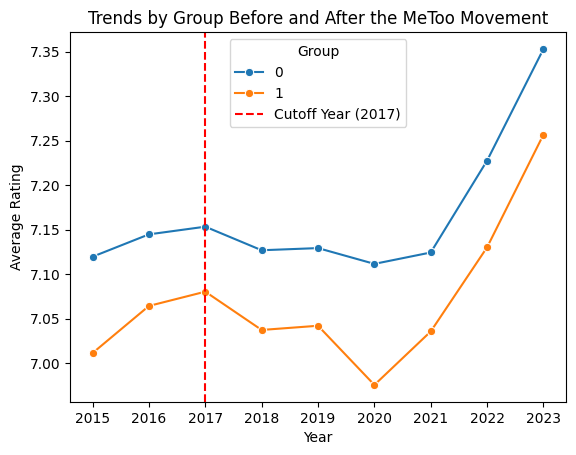

In [43]:
# Filter the DataFrame for the years you're interested in
full_period = merged_df[(merged_df['startYear'] >= 2015)]

# Group the data by year and 'is_actress' to calculate the average rating
grouped_full = full_period.groupby(['startYear', 'is_actress'])['averageRating'].mean().reset_index()

# Use seaborn lineplot to plot the trends for the entire period
sns.lineplot(x='startYear', y='averageRating', hue='is_actress', data=grouped_full, marker='o')

# Add a vertical line for the cutoff year
plt.axvline(x=2017, color='red', linestyle='--', label='Cutoff Year (2017)')

# Title and labels
plt.title('Trends by Group Before and After the MeToo Movement')
plt.legend(title='Group')
plt.xlabel('Year')
plt.ylabel('Average Rating')

# Show the plot
plt.show()

# <font color='Red'>Note: 

- I added the code to filter out movies.
- Do we need to add controls and create new graph for it?
- What about the DID chart we had which looked good. Can we create that again?